### Summary
1.	Average daily revenue and per customer transaction on weekends were almost twice the amounts of on weekdays. We can have more promotions on weekends to improve revenue.
2.	Some cities had missing records for online shopping. For the current database, 20-40 years old customers purchased more. And customers preferred purchasing in-store than online, however the online average revenue was greater than in-store.
3.	Total revenue TOP3 categories: T-shirt, New Arrivals and Accessories. T-shirt was the most popular products. New Arrivals had high sales and margin, we can increase the promotion for them. 
4. Dataset investigation: confirm if there was any missing records which revenue equal to 0, means there was no transaction on weekday or weekend.       

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sales = pd.read_csv('/Users/yuruozhang/Documents/projects/sales_report.csv')

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22293 entries, 0 to 22292
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store_id      22293 non-null  int64  
 1   city          22293 non-null  object 
 2   channel       22293 non-null  object 
 3   gender_group  22293 non-null  object 
 4   age_group     22293 non-null  object 
 5   wkd_ind       22293 non-null  object 
 6   product       22293 non-null  object 
 7   customer      22293 non-null  int64  
 8   revenue       22293 non-null  float64
 9   order         22293 non-null  int64  
 10  quant         22293 non-null  int64  
 11  unit_cost     22293 non-null  int64  
 12  unit_price    22293 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 2.2+ MB


Seems no missing value in this dataframe.

In [5]:
sales.describe()

,store_id,customer,revenue,order,quant,unit_cost,unit_price
count,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000,22293.000000
mean,335.391558,1.629480,159.531371,1.651998,1.858072,46.124658,84.279998
std,230.236167,1.785605,276.254066,1.861480,2.347301,19.124347,46.314296
min,19.000000,1.000000,-0.660000,1.000000,1.000000,9.000000,0.000000
25%,142.000000,1.000000,64.000000,1.000000,1.000000,49.000000,56.000000
50%,315.000000,1.000000,99.000000,1.000000,1.000000,49.000000,79.000000
75%,480.000000,2.000000,175.000000,2.000000,2.000000,49.000000,99.000000
max,831.000000,58.000000,12538.000000,65.000000,84.000000,99.000000,299.000000


In [6]:
# fix outliers in 'revenue'
#The gap between min and max in 'revenue' is huge.
sales.revenue.value_counts()

79.00      3656
99.00      3114
59.00      1608
39.00      1196
198.00      793
           ... 
426.38        1
156.81        1
292.82        1
110.51        1
1038.00       1
Name: revenue, Length: 1411, dtype: int64

In [7]:
# Arrange 'revenue' into different level 
bins = [-1000,0,100,500,1000,2000,5000,10000,15000]
sales['revenue_level'] = pd.cut(sales.revenue, bins, right=False)

In [8]:
sales.groupby('revenue_level').revenue.describe()

,count,mean,std,min,25%,50%,75%,max
revenue_level,,,,,,,,
"[-1000, 0)",1.0,-0.660000,NaN,-0.66,-0.66,-0.66,-0.66,-0.66
"[0, 100)",13735.0,69.398428,24.057206,0.00,53.00,79.00,89.00,99.00
"[100, 500)",7662.0,221.046232,93.959692,100.00,149.00,198.00,271.00,498.00
"[500, 1000)",671.0,684.615633,134.712670,505.00,592.00,643.00,780.75,997.00
"[1000, 2000)",162.0,1358.550617,257.825041,1009.00,1155.25,1293.00,1541.25,1990.00
"[2000, 5000)",51.0,2949.593725,831.873589,2050.00,2328.79,2683.00,3410.00,4975.00
"[5000, 10000)",9.0,6295.780000,1308.101226,5039.59,5241.43,5947.00,6636.00,8836.00
"[10000, 15000)",2.0,11518.140000,1442.299844,10498.28,11008.21,11518.14,12028.07,12538.00


The counts of revenue < 0 and >=2000 are very smaill, then delete outliers from the dataframe.

In [9]:
sales = sales[(sales.revenue>0) & (sales.revenue<2000)]
sales.revenue.describe()

count    22200.000000
mean       149.833600
std        171.650825
min         10.000000
25%         65.000000
50%         99.000000
75%        168.447500
max       1990.000000
Name: revenue, dtype: float64

In [10]:
# Deal with "Unknown" values in 'age_group' and 'gender_group'
# Find out the ratio of "Unknown"
import numpy as np
sales.loc[sales.age_group == 'Unkown', 'age_group'] = np.nan
sales.loc[sales.gender_group == 'Unkown', 'gender_group'] = np.nan

In [11]:
sales.isnull().sum() / len(sales)

store_id         0.000000
city             0.000000
channel          0.000000
gender_group     0.005315
age_group        0.006171
wkd_ind          0.000000
product          0.000000
customer         0.000000
revenue          0.000000
order            0.000000
quant            0.000000
unit_cost        0.000000
unit_price       0.000000
revenue_level    0.000000
dtype: float64

The ratios are very small, delete the 'Unkown' values.

In [12]:
sales.dropna(inplace=True)

In [13]:
sales.revenue.describe()

count    22061.000000
mean       150.216403
std        172.062578
min         10.000000
25%         66.000000
50%         99.000000
75%        172.000000
max       1990.000000
Name: revenue, dtype: float64

In [14]:
sales.head()

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost,unit_price,revenue_level
0,658,Shenzhen,Store,Female,25-29,Weekday,New Arrivals,4,796.0,4,4,59,199,"[500, 1000)"
1,146,Hangzhou,Store,Female,25-29,Weekday,sports,1,149.0,1,1,49,149,"[100, 500)"
2,70,Shenzhen,Store,Male,>=60,Weekday,T-shirt,2,178.0,2,2,49,89,"[100, 500)"
3,658,Shenzhen,Store,Female,25-29,Weekday,T-shirt,1,59.0,1,1,49,59,"[0, 100)"
4,229,Shenzhen,Store,Male,20-24,Weekend,Sock,2,65.0,2,3,9,22,"[0, 100)"


Date Metric: wkd_ind (weekday/ weekend)
Customer Metric: city, gender_group, age_group, channel(buy in store/ online) 
Product: product, unit_cost, unit_price
Sales: customer, revenue, order, quant

# weekday vs weekend

In [15]:
# Compare the average_revenue:
sales.groupby('wkd_ind').revenue.describe()

,count,mean,std,min,25%,50%,75%,max
wkd_ind,,,,,,,,
Weekday,12324.0,155.829499,179.045219,10.0,66.0,99.0,191.0,1990.0
Weekend,9737.0,143.111978,162.527257,10.0,62.0,99.0,158.0,1872.0


<AxesSubplot:xlabel='wkd_ind', ylabel='revenue'>

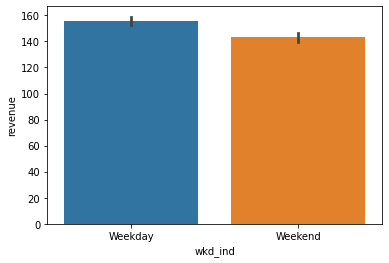

In [16]:
sns.barplot(x='wkd_ind', y='revenue', data=sales)

The average revenue on weekday is higher than on weekend. 
Investigate the dataset, if there is any missing records with 0 revenue.

In [17]:
# Compare the daily_revenue
# dily_revenue = total revenue / days
sales.groupby('wkd_ind').revenue.sum()

wkd_ind
Weekday    1920442.74
Weekend    1393481.33
Name: revenue, dtype: float64

In [18]:
# ratio of daily revenue: weekend/weekday
(1393481.33/2) / (1920442.74/5)

1.8140105156168311

The weekend's daily revenue is 1.8 times the weekday's amount.

In [19]:
# daily_passenger_flow = total_customer / days
sales.groupby("wkd_ind").customer.sum()

wkd_ind
Weekday    20288
Weekend    14570
Name: customer, dtype: int64

In [20]:
# ratio = weekend/weekday
(14570/2) / (20288/5)

# Customers shopping on weekend is 1.9 times the amount on weekday.

1.7953962933753944

In [21]:
# daily_per_customer_transaction = total_revenue / total_customer
sales.groupby('wkd_ind').revenue.sum() / sales.groupby('wkd_ind').customer.sum()

# per customer transaction on weekend is $1 higher than on weekday

wkd_ind
Weekday    94.659047
Weekend    95.640448
dtype: float64

Summay: 
Although the average revenue on weekday is higher than on weekend, 
the daily revenue and per customer transaction on weekend are almost twice the amounts of on weekday. 
And per customer transaction on weekend is also higher than on weekday.
To increase total revenue, we can improve the weekend sales, for example have more promotion on weekend.

# revenue vs products

In [22]:
# find the indics that the total revenues for different products descending
sales.groupby('product').revenue.mean().sort_values(ascending=False).index

Index(['Sweater', 'Accessories', 'Dresses', 'New Arrivals', 'Jean', 'T-shirt',
       'sports', 'Shorts', 'Sock'],
      dtype='object', name='product')

[Text(0, 0, 'Sweater'),
 Text(1, 0, 'Accessories'),
 Text(2, 0, 'New Arrivals'),
 Text(3, 0, 'Dresses'),
 Text(4, 0, 'Jean'),
 Text(5, 0, 'T-shirt'),
 Text(6, 0, 'sports'),
 Text(7, 0, 'Shorts'),
 Text(8, 0, 'Sock')]

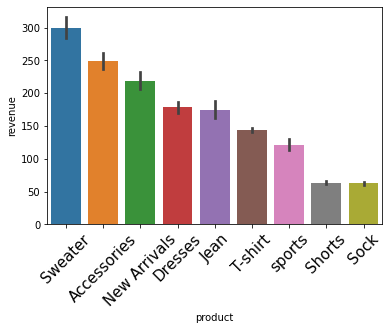

In [23]:
# average revenue for each categories
ax = sns.barplot(x='product', y='revenue', data=sales, order=sales.groupby('product').revenue.mean().sort_values(ascending=False).index)
ax.set_xticklabels(labels = ['Sweater', 'Accessories', 'New Arrivals', 'Dresses', 'Jean', 'T-shirt',
       'sports', 'Shorts', 'Sock'], rotation = 45,fontsize = 15)

TOP 3 average_revenue categories: Sweater, Accessories, New Arrivals

<AxesSubplot:xlabel='product', ylabel='revenue'>

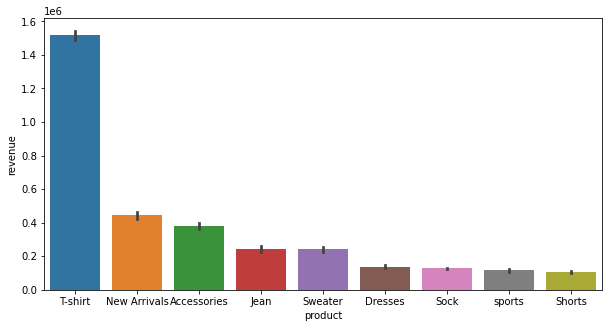

In [24]:
# Total revenue for each categories
fig = plt.figure(figsize=(10,5))
sns.barplot(x='product', y='revenue', data=sales, estimator=sum,
            order=sales.groupby('product').revenue.sum().sort_values(ascending=False).index)

TOP3 total_revenue categories: T-shirt, New Arrivals, Accessories. 
Compare with the average_revenue barplot, sweater has the highest average revenue because the quantity is low.

In [25]:
sales.groupby('city').revenue.sum().sort_values(ascending=False).index

Index(['Shenzhen', 'Wuhan', 'Hangzhou', 'Shanghai', 'Guangzhou', 'Chongqing',
       'Xian', 'Chengdu', 'Beijing', 'Nanjing'],
      dtype='object', name='city')

# Customers' purchasing habits

[Text(0, 0, 'Shenzhen'),
 Text(1, 0, 'Wuhan'),
 Text(2, 0, 'Hangzhou'),
 Text(3, 0, 'Shanghai'),
 Text(4, 0, 'Guangzhou'),
 Text(5, 0, 'Chongqing'),
 Text(6, 0, 'Xian'),
 Text(7, 0, 'Chengdu'),
 Text(8, 0, 'Beijing'),
 Text(9, 0, 'Nanjing')]

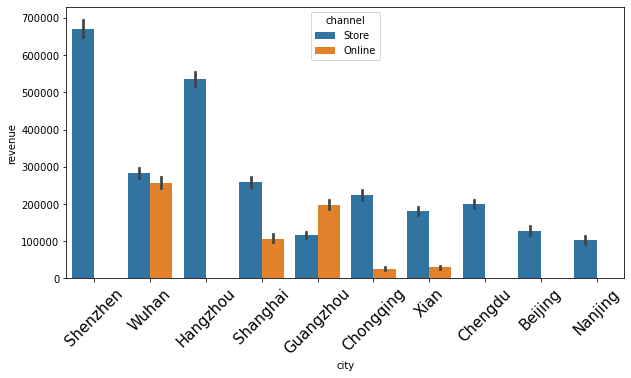

In [26]:
# city vs channel
fig = plt.figure(figsize=(10,5))
ax = sns.barplot(x='city', y='revenue', hue='channel', data=sales, estimator=sum,
           order=sales.groupby('city').revenue.sum().sort_values(ascending=False).index)
ax.set_xticklabels(labels = ['Shenzhen', 'Wuhan', 'Hangzhou', 'Shanghai', 'Guangzhou', 'Chongqing',
       'Xian', 'Chengdu', 'Beijing', 'Nanjing'], rotation = 45,fontsize = 15)

1. Some cities don't have online shopping records, there might be some mistakes for this dataframe.
2. For the current data, people in Wuhan, Shanghai, Chongqing and Xian prefer shopping in store. People in Guangzhou prefer online.

<AxesSubplot:xlabel='gender_group', ylabel='revenue'>

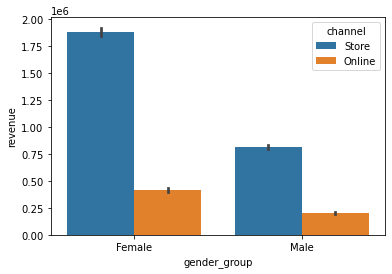

In [27]:
# Compare total_revenue that female and male purchased in-store and online
sns.barplot(x='gender_group', y='revenue', hue='channel', data=sales, estimator=sum,
           order=sales.groupby('gender_group').revenue.sum().sort_values(ascending=False).index)

All of customers like shopping in store than online. Female shopping more online than male

<AxesSubplot:xlabel='gender_group', ylabel='revenue'>

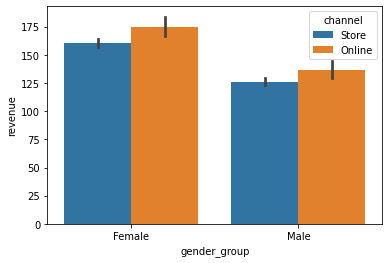

In [28]:
# compare in-store and online average_revenue 
sns.barplot(x='gender_group', y='revenue', hue='channel', data=sales,
           order=sales.groupby('gender_group').revenue.mean().sort_values(ascending=False).index)

The online average revenue is greater than in-store shopping. 

<AxesSubplot:xlabel='age_group', ylabel='revenue'>

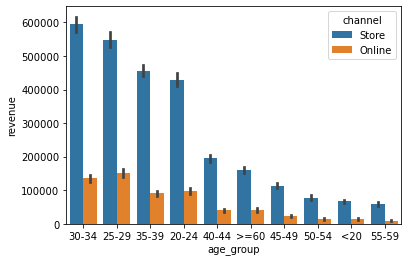

In [29]:
# age vs revenue
sns.barplot(x='age_group', y='revenue', hue='channel', data=sales, estimator=sum,
           order=sales.groupby('age_group').revenue.sum().sort_values(ascending=False).index)

20-40 year-old customers purchased more. Plople more liked shopping in-store. 

# margin vs products

In [30]:
#create "unit_revenue" and "unit_margin" 
sales['unit_revenue'] = sales.revenue / sales.quant
sales['unit_margin'] = sales.unit_revenue - sales.unit_cost
sales.head()

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost,unit_price,revenue_level,unit_revenue,unit_margin
0,658,Shenzhen,Store,Female,25-29,Weekday,New Arrivals,4,796.0,4,4,59,199,"[500, 1000)",199.000000,140.000000
1,146,Hangzhou,Store,Female,25-29,Weekday,sports,1,149.0,1,1,49,149,"[100, 500)",149.000000,100.000000
2,70,Shenzhen,Store,Male,>=60,Weekday,T-shirt,2,178.0,2,2,49,89,"[100, 500)",89.000000,40.000000
3,658,Shenzhen,Store,Female,25-29,Weekday,T-shirt,1,59.0,1,1,49,59,"[0, 100)",59.000000,10.000000
4,229,Shenzhen,Store,Male,20-24,Weekend,Sock,2,65.0,2,3,9,22,"[0, 100)",21.666667,12.666667


In [31]:
sales.unit_margin.describe()

count    22061.000000
mean        38.082344
std         39.902734
min        -86.000000
25%         14.000000
50%         30.000000
75%         50.000000
max        270.000000
Name: unit_margin, dtype: float64

<AxesSubplot:xlabel='product', ylabel='unit_margin'>

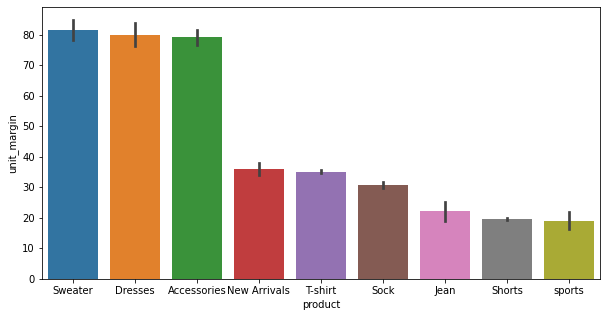

In [32]:
# average_margin for each categories
fig = plt.figure(figsize=(10,5))
sns.barplot(x='product', y='unit_margin', data=sales, 
            order=sales.groupby('product').unit_margin.mean().sort_values(ascending=False).index)

Top3 average margin categories: Sweater, Dresses, Accessories

In [33]:
# margin for each categories
bins = [-100, -25, 0, 25, 50, 100, 150, 200]
sales['margin_level'] = pd.cut(sales.unit_margin, bins, right=False)
sales.groupby('margin_level').unit_margin.describe()

,count,mean,std,min,25%,50%,75%,max
margin_level,,,,,,,,
"[-100, -25)",448.0,-35.807463,10.120606,-86.0,-40.0,-30.0,-30.0,-25.250000
"[-25, 0)",2317.0,-9.919035,4.804961,-25.0,-10.0,-10.0,-10.0,-0.165000
"[0, 25)",6117.0,14.102649,5.674121,0.0,10.0,14.0,20.0,24.728889
"[25, 50)",4829.0,32.401487,5.353275,25.0,30.0,30.0,30.0,49.928571
"[50, 100)",6234.0,57.797051,13.015117,50.0,50.0,50.0,70.0,99.454545
"[100, 150)",1653.0,119.772390,16.002587,100.0,100.0,120.0,136.0,149.627143
"[150, 200)",393.0,158.329243,10.500466,150.0,150.0,150.0,170.0,195.000000


<AxesSubplot:xlabel='product', ylabel='quant'>

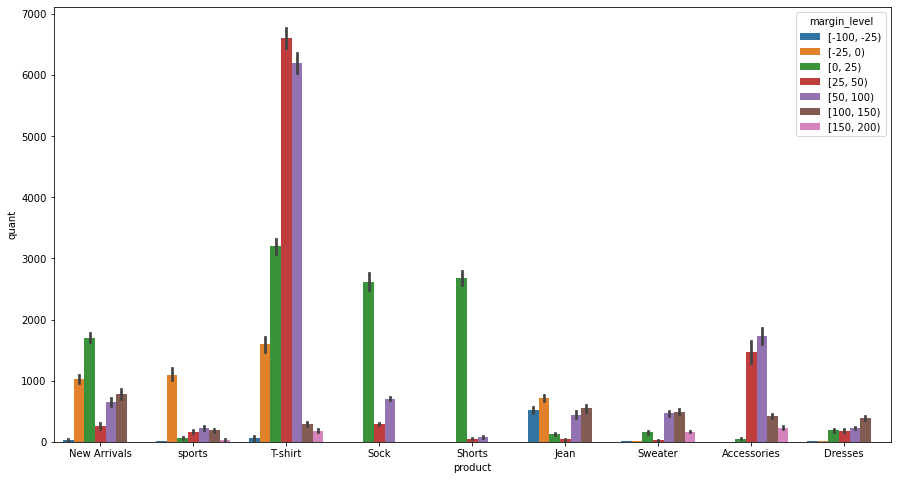

In [34]:
# product vs quant in different margin level
fig = plt.figure(figsize=(15,8))
sns.barplot(x='product', y='quant', hue='margin_level', estimator=sum, data=sales)

T-shirt is the most popular products.
All of the categories have low margin. Jeans have both a loss and a profit.
New Arrivals, Sweaters, Accessories and Dresses have good profits.    

<AxesSubplot:xlabel='product', ylabel='unit_margin'>

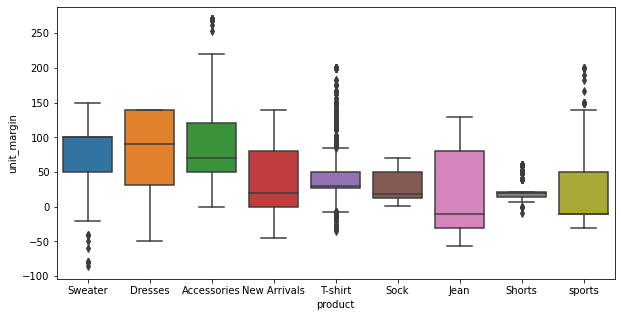

In [35]:
# product vs unit_margin
fig = plt.figure(figsize=(10,5))
sns.boxplot(x='product', y='unit_margin', data=sales, 
            order=sales.groupby('product').unit_margin.mean().sort_values(ascending=False).index)

Sweaters have some unit_margins below 0. Sweaters may often on sale.